In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df= pd.read_csv('https://raw.githubusercontent.com/mren5/NYPDcsv/main/NYPD_Arrest_Data__Year_to_Date_.csv')

In [ ]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,263187871,02/07/2023,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,S,120,0,25-44,M,BLACK,951637,171141,40.636362,-74.117505,POINT (-74.117505 40.636362)
1,261368273,01/04/2023,NaN,(null),NaN,(null),RPA0076801,M,M,34,0,25-44,F,BLACK,1004287,251338,40.856519,-73.927564,POINT (-73.927564 40.856519)
2,261667175,01/10/2023,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,42,0,18-24,F,WHITE HISPANIC,1008754,238895,40.822355,-73.911463,POINT (-73.911463 40.822355)
3,264298625,02/27/2023,NaN,(null),NaN,(null),PL 2224000,F,Q,113,0,25-44,M,BLACK,1039225,181937,40.665881,-73.801837,POINT (-73.80183654 40.66588105)
4,261516485,01/07/2023,397.0,"ROBBERY,OPEN AREA UNCLASSIFIED",105.0,ROBBERY,PL 1601001,F,M,18,0,<18,M,BLACK,988210,218129,40.765390,-73.985702,POINT (-73.985702 40.76539)


In [ ]:
df.columns
#review of columns in the dataset

Index(['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'LAW_CAT_CD', 'ARREST_BORO', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'PERP_SEX', 'PERP_RACE', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column'],
      dtype='object')

In [ ]:
drop_cols = ['ARREST_KEY', 'ARREST_DATE', 'PD_CD', 'PD_DESC', 'KY_CD', 'OFNS_DESC',
       'LAW_CODE', 'ARREST_PRECINCT',
       'JURISDICTION_CODE', 'AGE_GROUP', 'X_COORD_CD',
       'Y_COORD_CD', 'Latitude', 'Longitude', 'New Georeferenced Column']
#DATA CLEANING and removing columns that will not be used for the analysis

In [ ]:
df.drop(drop_cols, inplace =True, axis=1)

In [ ]:
df.head()
#review of the table without the uncessary columns 

,LAW_CAT_CD,ARREST_BORO,PERP_SEX,PERP_RACE
0,F,S,M,BLACK
1,M,M,F,BLACK
2,M,B,F,WHITE HISPANIC
3,F,Q,M,BLACK
4,F,M,M,BLACK


In [ ]:
df1=df.rename(columns= {'LAW_CAT_CD': 'Level of Offense', 'ARREST_BORO':'Borough','PERP_SEX':'Gender','PERP_RACE':'Race'} )
#renaming columns 

In [ ]:
df1
#reviewing columns with new headers

,Level of Offense,Borough,Gender,Race
0,F,S,M,BLACK
1,M,M,F,BLACK
2,M,B,F,WHITE HISPANIC
3,F,Q,M,BLACK
4,F,M,M,BLACK
...,...,...,...,...
54571,F,Q,M,ASIAN / PACIFIC ISLANDER
54572,M,M,M,WHITE HISPANIC
54573,F,Q,M,WHITE
54574,M,Q,M,ASIAN / PACIFIC ISLANDER


In [ ]:
df2=df1.loc[(df1['Level of Offense']=='F') | (df1['Level of Offense']=='M') | (df1['Level of Offense']=='V')]
df2
#Selecting output that only includes data from the data dictionary

,Level of Offense,Borough,Gender,Race
0,F,S,M,BLACK
1,M,M,F,BLACK
2,M,B,F,WHITE HISPANIC
3,F,Q,M,BLACK
4,F,M,M,BLACK
...,...,...,...,...
54571,F,Q,M,ASIAN / PACIFIC ISLANDER
54572,M,M,M,WHITE HISPANIC
54573,F,Q,M,WHITE
54574,M,Q,M,ASIAN / PACIFIC ISLANDER


In [ ]:
df2['Level of Offense'].unique()

array(['F', 'M', 'V'], dtype=object)

In [ ]:
df3=df2.loc[:,['Level of Offense', 'Borough', 'Race','Gender']]
df3

,Level of Offense,Borough,Race,Gender
0,F,S,BLACK,M
1,M,M,BLACK,F
2,M,B,WHITE HISPANIC,F
3,F,Q,BLACK,M
4,F,M,BLACK,M
...,...,...,...,...
54571,F,Q,ASIAN / PACIFIC ISLANDER,M
54572,M,M,WHITE HISPANIC,M
54573,F,Q,WHITE,M
54574,M,Q,ASIAN / PACIFIC ISLANDER,M


In [ ]:
df3['Level of Offense'].unique()

array(['F', 'M', 'V'], dtype=object)

In [ ]:
df4= df3[df3['Gender'] !='U']
df4
##analyzing and cleaning data to remove all values that contain 'U'

,Level of Offense,Borough,Race,Gender
0,F,S,BLACK,M
1,M,M,BLACK,F
2,M,B,WHITE HISPANIC,F
3,F,Q,BLACK,M
4,F,M,BLACK,M
...,...,...,...,...
54571,F,Q,ASIAN / PACIFIC ISLANDER,M
54572,M,M,WHITE HISPANIC,M
54573,F,Q,WHITE,M
54574,M,Q,ASIAN / PACIFIC ISLANDER,M


In [ ]:
df4['Gender'].unique()
#reviewing data output from gender

array(['M', 'F'], dtype=object)

In [ ]:
df4['Race'].unique()
#reviewing data from Race

array(['BLACK', 'WHITE HISPANIC', 'WHITE', 'UNKNOWN', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE'],
      dtype=object)

In [ ]:
df5= df4[df4['Race'] !='UNKNOWN']
df5
#cleaning data to exclude 'unknown'

,Level of Offense,Borough,Race,Gender
0,F,S,BLACK,M
1,M,M,BLACK,F
2,M,B,WHITE HISPANIC,F
3,F,Q,BLACK,M
4,F,M,BLACK,M
...,...,...,...,...
54571,F,Q,ASIAN / PACIFIC ISLANDER,M
54572,M,M,WHITE HISPANIC,M
54573,F,Q,WHITE,M
54574,M,Q,ASIAN / PACIFIC ISLANDER,M


In [ ]:
df5['Race'].unique()

array(['BLACK', 'WHITE HISPANIC', 'WHITE', 'BLACK HISPANIC',
       'ASIAN / PACIFIC ISLANDER', 'AMERICAN INDIAN/ALASKAN NATIVE'],
      dtype=object)

In [ ]:
df_offense=df5.groupby(['Level of Offense'])['Borough'].count().reset_index(name='count')
df_offense
#analyzing count  for level of offense for each category 

,Level of Offense,count
0,F,22962
1,M,29744
2,V,306


In [ ]:
df_borough=df5.groupby(['Borough'])['Level of Offense'].count().reset_index(name='count')
df_borough
#analyzing count for level of offense by borough 

,Borough,count
0,B,12561
1,K,14885
2,M,12081
3,Q,11211
4,S,2274


In [ ]:
df_race=df5.groupby(['Race'])['Gender'].count().reset_index(name='count')
df_race
#analyzing count for level of offens by Race

,Race,count
0,AMERICAN INDIAN/ALASKAN NATIVE,183
1,ASIAN / PACIFIC ISLANDER,2796
2,BLACK,26226
3,BLACK HISPANIC,4944
4,WHITE,5352
5,WHITE HISPANIC,13511


In [ ]:
df_gender=df5.groupby(['Gender'])['Level of Offense'].count()
df_gender
#analyzing count for level of offens by Race by gender

Gender
F     8850
M    44162
Name: Level of Offense, dtype: int64

<AxesSubplot:xlabel='Level of Offense', ylabel='count'>

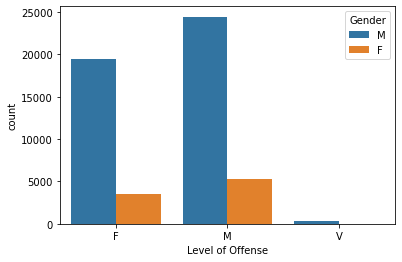

In [ ]:
sns.countplot(x='Level of Offense', hue='Gender', data=df5)
#created countplot based on level of offense and gender

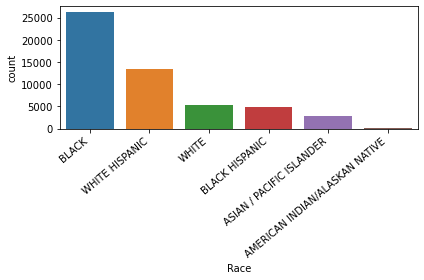

In [ ]:
sns.countplot(x='Race',data=df5)
ax=sns.countplot(x="Race", data=df5)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()
#created countplot for count of offense based on Race 

<AxesSubplot:xlabel='Borough', ylabel='count'>

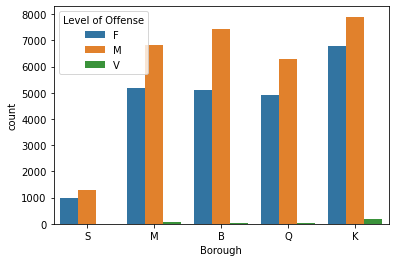

In [ ]:
sns.countplot(x='Borough', hue='Level of Offense', data=df5)
#created countplox based on level of offense and borough

**Conclusion**


In [ ]:
#Based on the analysis, the level of offense for felony, misdemeanor and violations are higher in males compared to females. The secound count plot shows the breakdown of crimes by race. Based on Boroughs, appears Brookly and the Bronx has the most crimes.  